# Q3

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('face.jpg')[:,:,::-1]

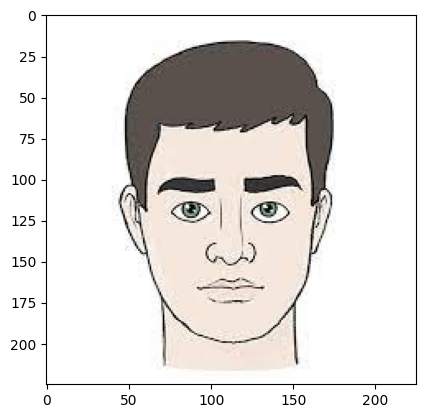

In [3]:
plt.imshow(image)

In [101]:
def neighbor(x1, y1, xn, yn, xs, ys, image):
    # Calculate the mean intensity values of the current pixel and its neighbors
    v1 = np.mean(image[x1, y1, :])
    vn = np.mean(image[xn, yn, :])
    vs = np.mean(image[xs, ys, :])
    
    # Check if the difference in intensity values between the current pixel and its neighbors is below a certain threshold
    # If yes, return True indicating that the neighbor is valid
    if abs(v1 - vn) < 23 and abs(v1 - vs) < 28:
        return True
    # Otherwise, return False indicating that the neighbor is invalid
    return False

def segment(image):
    # Create a copy of the input image
    segmented_image = image.copy()
    
    # Define the seed point for region growing
    # seed = (140, 150)
    seed = (50, 100)
    
    # Initialize a stack and a visit matrix to keep track of visited pixels
    stack = []
    rows = image.shape[0]
    cols = image.shape[1]
    visit = [[False for j in range(cols)] for i in range(rows)]
    
    # Add the seed point to the stack and mark it as visited
    stack.append([seed[0], seed[1]])
    visit[seed[0]][seed[1]] = True
    segmented_image[seed[0], seed[1], :] = [0, 255, 0]
    
    # Perform region growing until the stack is empty
    while len(stack) != 0:
        x, y = stack.pop()
        
        # Check the four neighboring pixels of the current pixel and, if a neighbor is valid, add it to the stack and mark it as visited
        if x + 1 < rows and visit[x + 1][y] == False and neighbor(x + 1, y, x, y, seed[0], seed[1], image) == True:
            stack.append([x + 1, y])
            segmented_image[x + 1, y, :] = [0, 255, 0]
            visit[x + 1][y] = True
        
        if y + 1 < cols and visit[x][y + 1] == False and neighbor(x, y + 1, x, y, seed[0], seed[1], image) == True:
            stack.append([x, y + 1])
            segmented_image[x, y + 1, :] = [0, 255, 0]
            visit[x][y + 1] = True
            
        if x - 1 > 0 and visit[x - 1][y] == False and neighbor(x - 1, y, x, y, seed[0], seed[1], image) == True:
            stack.append([x - 1, y])
            segmented_image[x - 1, y, :] = [0, 255, 0]
            visit[x - 1][y] = True
            
        if y - 1 > 0 and visit[x][y - 1] == False and neighbor(x, y - 1, x, y, seed[0], seed[1], image) == True:
            stack.append([x, y - 1])
            segmented_image[x, y - 1, :] = [0, 255, 0]
            visit[x][y - 1] = True                   
        
    # Return the segmented image with the segmented region colored in green
    return segmented_image

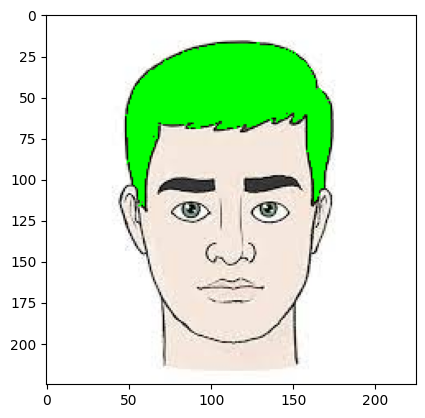

In [102]:
segmented_image = segment(image)
plt.imshow(segmented_image)